In [16]:
##This code creates histogram plots of the weekly max percent up and max percent down of each stock for data
#visualization and trying to determine good cutoffs to label classifiers for machine learning 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sys
##import modules

In [17]:
data = pd.read_excel('/Users/jpjansen/Documents/Machine Learning Set V2.xlsx',header = 0)
np.set_printoptions(threshold=sys.maxsize)
data = data.to_numpy()
##read in data

In [18]:
maxup = data[:,18] #Weekly maximum percent up for each stock
maxdown = data[:,19] #Weekly max percent down for each stock
print(maxup)
print('Max up median',np.median(maxup)) #medians 
print('Max down median', np.median(maxdown))

[59.85401459854013 36.69064748201439 22.13740458015267 6.603773584905645
 8.292079207920795 5.1470588235294 4.864864864864857 5.902777777777776
 22.60061919504644 24.99999999999999 5.340160936356989 18.13333333333333
 1.503759398496242 0.0 7.978723404255322 13.10679611650485
 10.88454507101674 18.57142857142858 27.03252032520325 18.53832442067736
 6.060606060606049 492.5925925925926 14.11764705882353 10.07462686567164
 7.194244604316554 3.673469387755096 13.43283582089552 9.76989815164089
 1.774193548387088 6.393442622950809 68.81028938906752 0.141978230004738
 1.754385964912282 7.084019769357491 4.166666666666663 68.83116883116882
 14.18092909535453 34.01360544217687 7.638888888888896 4.035874439461877
 17.57719714964371 25.46125461254612 17.46308724832215 11.68831168831168
 71.27272727272727 25.42533081285445 51.85185185185183 11.17021276595744
 13.79310344827586 12.8440366972477 15.96169193934557 23.62404741744284
 51.77713736791548 6.706204379562038 37.26207906295754 0.286944045911

In [23]:
histogram = []
x = []
##histogram binned in one percent increments from 0 percent to 40% 
for i in range(0,41):
    x.append(i)
    count = 0
    for z in range(len(maxup)):
        if maxup[z]>=float(i) and maxup[z]<float(i+1): ##first bin is from 0 to 1 % and so on...
            count+=1
        elif i == 40: ##once we get to forty just sum every max up greater than 40 so 40 is really the forty plus column
            if maxup[z]>=(i):
                count+=1 
    histogram.append(count/len(maxup))
#double check that binning worked out ok 
print(histogram)
print(len(maxup)) 
print(sum(histogram))
print(np.median(maxup))

[0.1209563994374121, 0.08157524613220815, 0.04781997187060478, 0.053445850914205346, 0.05625879043600562, 0.03938115330520394, 0.04219409282700422, 0.046413502109704644, 0.03234880450070324, 0.04922644163150492, 0.02390998593530239, 0.02250351617440225, 0.02531645569620253, 0.02531645569620253, 0.026722925457102673, 0.02109704641350211, 0.016877637130801686, 0.009845288326300985, 0.016877637130801686, 0.014064697609001406, 0.015471167369901548, 0.014064697609001406, 0.009845288326300985, 0.016877637130801686, 0.007032348804500703, 0.011251758087201125, 0.0, 0.009845288326300985, 0.007032348804500703, 0.007032348804500703, 0.007032348804500703, 0.0028129395218002813, 0.005625879043600563, 0.0028129395218002813, 0.005625879043600563, 0.007032348804500703, 0.005625879043600563, 0.008438818565400843, 0.004219409282700422, 0.0028129395218002813, 0.07735583684950774]
711
0.9999999999999996
8.292079207920795


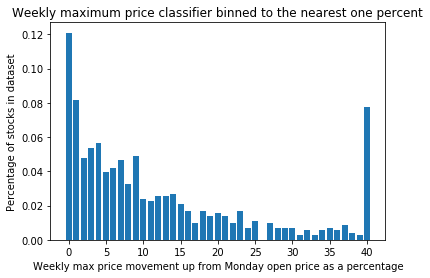

In [24]:
plt.bar(x,height = histogram)
plt.title('Weekly maximum price classifier binned to the nearest one percent')
plt.xlabel('Weekly max price movement up from Monday open price as a percentage')
plt.ylabel ('Percentage of stocks in dataset')
plt.show()

In [10]:
#now do the same thing but with the max down column 
downhistogram = []
downx = []
for i in range(0,41):
    downx.append(i)
    count = 0
    for z in range(len(maxdown)):
        if maxdown[z]>= float(i) and maxdown[z]< float(i+1):
            count+=1
        elif i==40:
            if maxup[z]>=(i):
                count+=1 
    downhistogram.append(count/len(maxdown))
print(downhistogram)
print('Max Down Median', np.median(maxdown))

[0.060393258426966294, 0.05758426966292135, 0.0702247191011236, 0.046348314606741575, 0.06179775280898876, 0.04073033707865169, 0.05196629213483146, 0.06320224719101124, 0.0351123595505618, 0.04915730337078652, 0.0351123595505618, 0.042134831460674156, 0.032303370786516857, 0.02949438202247191, 0.021067415730337078, 0.02247191011235955, 0.03089887640449438, 0.012640449438202247, 0.026685393258426966, 0.016853932584269662, 0.01544943820224719, 0.016853932584269662, 0.01544943820224719, 0.011235955056179775, 0.007022471910112359, 0.011235955056179775, 0.009831460674157303, 0.007022471910112359, 0.01544943820224719, 0.016853932584269662, 0.004213483146067416, 0.007022471910112359, 0.007022471910112359, 0.004213483146067416, 0.0056179775280898875, 0.004213483146067416, 0.0014044943820224719, 0.0056179775280898875, 0.0056179775280898875, 0.0056179775280898875, 0.07865168539325842]
Max Down Median 9.106371965992686


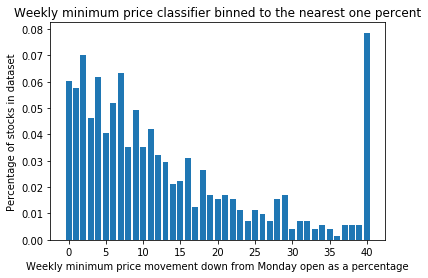

In [14]:
plt.bar(x,height = downhistogram)
plt.title('Weekly minimum price classifier binned to the nearest one percent')
plt.xlabel('Weekly minimum price movement down from Monday open as a percentage')
plt.ylabel ('Percentage of stocks in dataset')
plt.show()